In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
%matplotlib inline

__예시__ - 지도학습 모델의 평가

In [3]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 인위적 dataset
X, y = make_blobs(random_state=0)

# split data and labels -training / test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# model & fit on training set
logreg = LogisticRegression().fit(X_train, y_train)

# evaluate model on test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


* 데이터를 훈련 세트 / 테스트 세트 나누는 이유 :
    * 모델이 새로운 데이터에 대해 얼마나 잘 일반화되는지 측정
    * 훈련 세트에 잘 맞는 것 보다 새로운 데이터에 대해 얼마나 예측을 잘 하는지가 중요  


## 5.1 교차 검증
: 일반화 성능 측정 방법  
: 데이터를 여러 번 반복해서 나눔 & 여러 모델 학습  
→  훈련 세트 / 테스트 세트를 한 번에 나눈는 것 보다 안정적  

* __k-겹 교차 검증__ (k-fold cross-validation)  
  
    * k = 주로 5 or 10
    * " fold " : 거의 비슷한 크기의 부분 집합
    * 각 부분 집합별로 일련의 모델 생성  
        \( k = 5 )
        * 모델 1 : 테스트 세트 = fold 1 (정확도 평가) / 훈련 세트 = fold 2 ~ 5
        * 모델 2 : 테스트 세트 = fold 2 (정확도 평가) / 훈련 세트 = fold 1, 3, 4, 5  
        * fold 3, 4, 5 를 테스트 세트로 사용해 반복  
    * 각 분할마다 정확도 측정

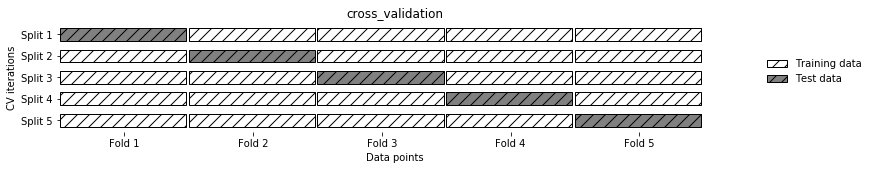

In [4]:
mglearn.plots.plot_cross_validation()

### 5.1.1 scikit-learn의 교차 검증
> * __cross_val_score__ ( 평가모델, 훈련 데이터, 타깃 레이블)

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# dataset
iris = load_iris()
# model
logreg = LogisticRegression()

# cross-validation (k=3)
scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [6]:
# cross-validation (k=5)
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [7]:
# 평균을 이용 - 정확도 간단하게
print("Cross-validation scores: {}".format(scores.mean()))

Cross-validation scores: 0.9733333333333334


> * __cross_validate__ ( 평가모델, 훈련 데이터, 타깃 레이블) : 분할마다 훈련 & 테스트에 걸린 시간 반환

In [8]:
from sklearn.model_selection import cross_validate

res = cross_validate(logreg, iris.data, iris.target, cv=5,
                     return_train_score=True)
display(res)

{'fit_time': array([0.03498054, 0.02900004, 0.04696202, 0.02796364, 0.02198505]),
 'score_time': array([0.0010016 , 0.00099969, 0.00101328, 0.        , 0.        ]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ]),
 'train_score': array([0.96666667, 0.96666667, 0.98333333, 0.98333333, 0.975     ])}

In [9]:
# 판다스 이용 - 결과 출력 & 평균 계산

res_df = pd.DataFrame(res)
display(res_df)
print("Mean times and scores:\n", res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.034981,0.001002,0.966667,0.966667
1,0.029000,0.001000,1.000000,0.966667
2,0.046962,0.001013,0.933333,0.983333
3,0.027964,0.000000,0.966667,0.983333
4,0.021985,0.000000,1.000000,0.975000


Mean times and scores:
 fit_time       0.032178
score_time     0.000603
test_score     0.973333
train_score    0.975000
dtype: float64


### 5.1.2 교차 검증의 장점
* 각 샘플은 한 번씩 테스트 세트가 됨
    * 모든 샘플에 대해 모델이 잘 일반화 되어야 높은 점수
  
  
* 데이터를 여러 개로 나눔 = 모델이 훈련 데이터에 얼마나 예민한지 파악
  
  
* 한 번의 분할보다 데이터를 효과적으로 사용
    * 더 많은 데이터를 모델 학습에 사용 = 더 정확한 모델

### 5.1.3 계층별 k-겹 교차 검증 & 그 외 전략  

__iris dataset__ : 데이터셋을 나열 순서대로 k개의 폴드로 나누는 것이 좋지 않은 경우

In [10]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


\- 첫 번째 1/3 클래스 = 0  
\- 두 번째 1/3 클래스 = 1  
\- 세 번째 1/3 클래스 = 2  
→ k=3 겹 교차 검증 적용 : 반복 마다 훈련 세트 & 테스트 세트 클래스 다르므로 정확도 = 0

* __계층별 k-겹 교차 검증__
    * 폴드 안의 클래스 비율 = 전체 데이터셋의 클래스 비율

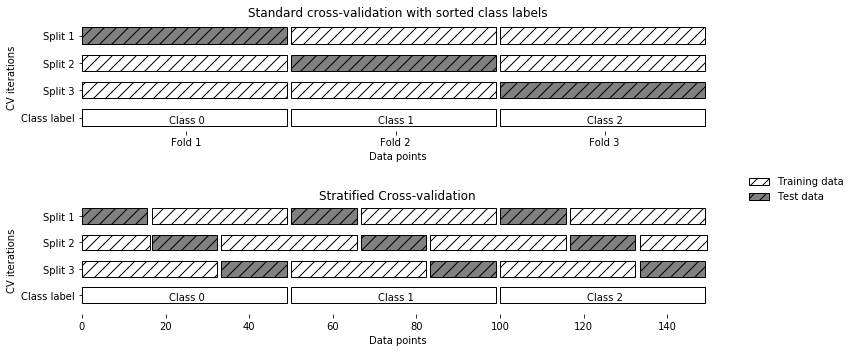

In [11]:
mglearn.plots.plot_stratified_cross_validation()

#### 교차 검증 상세 옵션
* __교차 검증 분할기__ 를 cv 매개변수에 전달
    * 분할 데이터를 세밀하게 제어

In [12]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

print("Cross-validation scores:\n{}".format(
      cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[1.         1.         0.86666667 0.93333333 0.83333333]


__iris dataset__ : 3-겹 교차 검증이 좋지 않은 이유

In [13]:
kfold = KFold(n_splits=3)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0. 0. 0.]


* 데이터를 섞어 샘플 순서 뒤죽박죽
    * __KFold ( shuffle = True )__

In [14]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores:\n{}".format(
    cross_val_score(logreg, iris.data, iris.target, cv=kfold)))

Cross-validation scores:
[0.98 0.96 0.96]


#### LOOCV ( Leave - One - Out Cross - Validation)
* 하나의 폴드에 하나의 샘플만 들어있는 k-fold cross-validation
* 각 반복에서 하나의 데이터 포인트 선택 - 테스트 세트로 사용

In [15]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.97


#### 임의 분할 교차 검증 ( Shuffle - Split Cross - Validation )
> __ShuffleSplit__ ( test_size, train_size, n_splits )
* train_size : 훈련 세트로 만들 포인트 수
* test_size : 훈련 세트와 중첩되지 않은, 테스트 세트로 만들 포인트 수
    * 정수 : 데이터 포인트 갯수
    * 실수 : 전체 데이터에서의 비율
* n_splits : 분할 반복 횟수

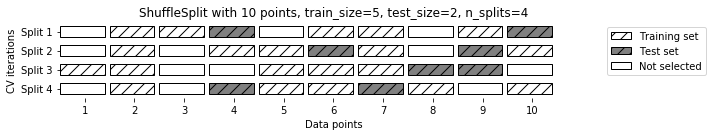

In [16]:
mglearn.plots.plot_shuffle_split()

In [17]:
# 데이터셋의 50% 훈련세트, 50% 테스트세트, 10번 반복 분할

from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)

scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.98666667 0.90666667 0.94666667 0.98666667 0.96       0.97333333
 0.97333333 0.93333333 0.98666667 0.88      ]


#### 그룹별 교차 검증
* 훈련 세트와 테스트 세트에 서로 다른 데이터가 들어가도록  
→ 새로운 데이터에 대한 일반화 성능을 더 정확하기 평가
* __GroupKFold__: 데이터를 담은 배열을 groups 매개변수로 전달
    * __groups__ 배열 : 훈련 세트 & 테스트 세트 만들 때 분리되지 않아야 할 그룹 지정

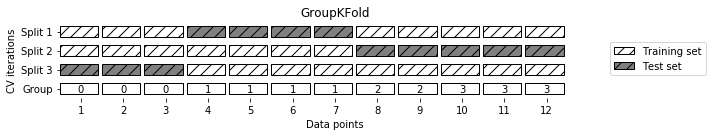

In [18]:
mglearn.plots.plot_group_kfold()

In [19]:
from sklearn.model_selection import GroupKFold

# 인위적 데이터셋
X, y = make_blobs(n_samples=12, random_state=0)

# 각 샘플이 속하는 그룹 (0 ~ 3) 지정
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]

scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(scores))

Cross-validation scores:
[0.75       0.6        0.66666667]


### 5.1.4 반복 교차 검증
* 회귀 : RepeatedKFold
* 분류 : RepeatedStratifiedKFold  
  
  
  
* n_splits : 분할 폴드 수 (기본값 = 5)
* n_repeats : 반복 횟수 (기본값 = 10)  
     → ( n_splits x n_repeats ) 개수 만큼의 전체 검증 점수 반환

In [20]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# dataset
iris = load_iris()

# model
logret = LogisticRegression()

from sklearn.model_selection import RepeatedStratifiedKFold

rskfold = RepeatedStratifiedKFold(random_state=42)
scores = cross_val_score(logreg, iris.data, iris.target, cv=rskfold)

print("Cross Validation score:\n", scores)
print("Cross Validation average score: {:.3f}".format(scores.mean()))

Cross Validation score:
 [1.         0.96666667 0.93333333 1.         0.93333333 0.96666667
 0.96666667 0.93333333 1.         0.96666667 0.93333333 1.
 1.         0.96666667 0.96666667 0.9        1.         1.
 0.93333333 0.96666667 0.93333333 0.96666667 0.96666667 1.
 0.96666667 1.         0.96666667 0.96666667 0.9        1.
 0.96666667 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667
 0.96666667 1.         1.         0.9        0.96666667 1.
 0.9        0.96666667 0.96666667 0.9        0.96666667 0.96666667
 1.         0.96666667]
Cross Validation average score: 0.965


***
## 5.2 그리드 서치
* 관심 있는 매개변수 대상으로 가능한 모든 조합 시도
  
### 5.2.1 간단한 그리드 서치
두 매개변수 조합에 대해 분류기 학습 & 평가 (for 문 사용)

In [21]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

print("Size of training set: {}   size of test set: {}".format(
      X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수 각 조합에 따라 SVC 훈련
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # SVC 평가 - 테스트 세트 이용
        score = svm.score(X_test, y_test)
        # 점수 더 좋으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112   size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### 5.2.2 매개변수 과대적합 & 검증 세트
* 그리드 서치 : 테스트 세트 정확도가 가장 높은 조합 선택
    * 새로운 데이터에 대해서는 정확도가 이어지지 않을 수 있다  
  
  
* 평가를 위해서는 모델 생성에 관여하지 않은 독립된 데이터셋 필요 - 데이터 다시 나누기
    * 훈련 세트 : 모델 생성
    * 검증 세트 : 모델 매개변수 선택
    * 테스트 세트 : 매개변수 성능 평가 ★사용될 모델 결정되고 딱 한번만 평가!

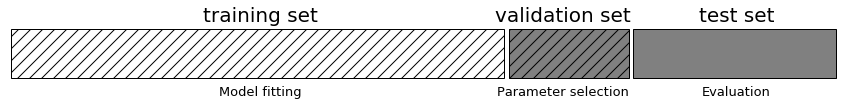

In [22]:
mglearn.plots.plot_threefold_split()

1. 검증 세트 사용해 최적의 매개변수 선택
2. 매개변수에서 훈련 세트 & 검증 세트 데이터 이용 - 다시 모델 생성
    * 가능한 많은 데이터 이용해서 모델 만들기 위해

In [23]:
from sklearn.svm import SVC

# split data - 훈련 + 검증 세트 (trainval) / 테스트 세트
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

# split 훈련 + 검증 (trainval) 세트 - 훈련 세트 / 검증 세트
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)

print("Size of training set: {}   size of validation set: {}   size of test set:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

## 1. 
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수 각 조합에 대해 SVC 훈련
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # SVC 평가 - 검증 세트 이용
        score = svm.score(X_valid, y_valid)
        # 점수 더 좋으면 매개변수와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

## 2. 훈련 세트 + 검증세트 이용해 다시 모델링
# 평가 - 테스트 세트 이용
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: ", best_parameters)
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84   size of validation set: 28   size of test set: 38

Best score on validation set: 0.96
Best parameters:  {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


### 5.2.3 교차 검증 사용한 그리드 서치
* 교차 검증을 이용해 훈련 세트 / 검증 세트 나누기
    * 교차 검증으로 각 매개변수 조합의 성능 평가
    * 일반화 성능 향상

In [24]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수 각 조합으로 SVC 훈련
        svm = SVC(gamma=gamma, C=C)
        # 교차 검증
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        # 교차 검증 정확도의 평균
        score = np.mean(scores)
        # 점수 더 좋으면 매개변후와 함께 기록
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
# 훈련 세트 + 검증 세트 합쳐서 다시 모델
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

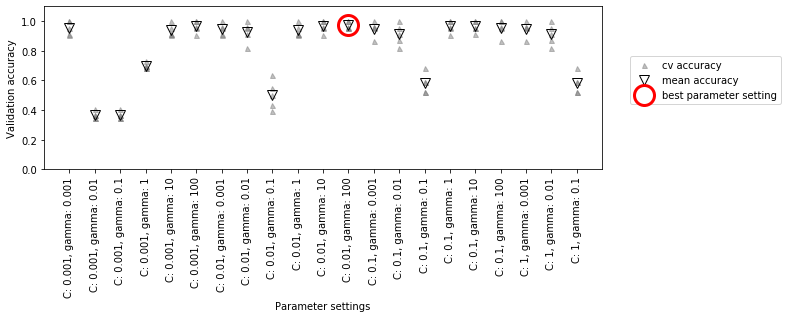

In [25]:
mglearn.plots.plot_cross_val_selection()

\- 각 매개변수 설정마다 총 5개 값 계산 (교차 검증 분할에 하나씩) 

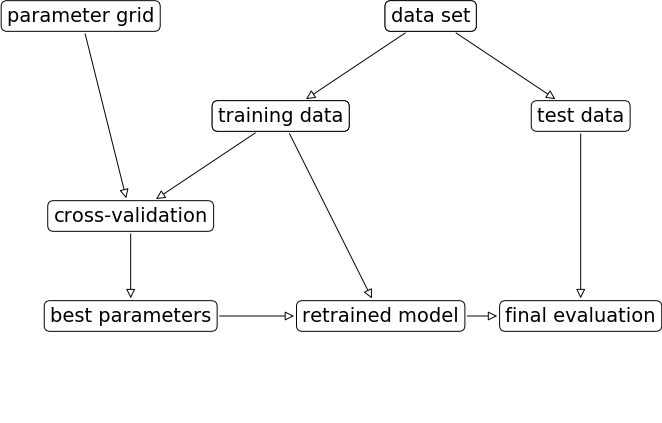

In [26]:
# 교차 검증 & 그리드 서치 적용 - 최종 매개변수 선택 & 모델 평가하는 전체 과정
mglearn.plots.plot_grid_search_overview()

>  __GridSearchCV__ 사용
1. 검색 대상 매개변수 param_grid 지정 : 딕셔너리 형
    * 키 : 조정하려는 매개변수 이름 ( C , gamma )
    * 값 : 탐색할 매개변수 설정 값 
  
  
> 2. GridSearchCV 객체 생성
    * 사용할 모델
    * 검색 대상 매개변수 그리드 param_grid
    * 교차 검증 설정
    
* best_params_ : 선택한 매개변수 속성
* best_score_ : 찾은 매개변수 설정으로 각 분할에서 얻은 정확도의 평균  
    \= 최상의 교차 검증 정확도
* best_estimator_ : 최적의 매개변수에서 전체 훈련 세트 사용해 학습한 모델

In [27]:
# 1.
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n{}".format(param_grid))

# 2.
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)

## split data - 훈련 세트 / 테스트 세트 : 과대적합 방지
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)

## 최적의 매개변수 찾기 & 새로운 모델 자동 생성
grid_search.fit(X_train, y_train)


Parameter grid:
{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [28]:
## 찾은 최적의 매개변수로 일반화 성능 평가
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Test set score: 0.97


In [29]:
## 최상의 교차 검증 정확도
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1}
Best cross-validation score: 0.97


In [30]:
## 만들어진 모델에 직접 접근
print("Best estimator:\n{}".format(grid_search.best_estimator_))

Best estimator:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


#### 교차 검증 결과 분석
*  교차 검증 결과 시각화
    * 검색 대상 매개변수가 모델의 일반화에 얼마나 영향을 주는지 이해  
    
    
* cv_results_ : 그리드 설치 결과

In [31]:
import pandas as pd
pd.set_option('display.max_columns', None)

# to DataFrame
results = pd.DataFrame(grid_search.cv_results_)

display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.00119915,0.000596094,0.00100026,0.000999928,0.000599909
std_fit_time,0.000399163,0.000486758,1.51991e-06,1.27057e-06,0.000489824
mean_score_time,0.000799847,0.000600243,0.000199127,0.000599575,0.00059948
std_score_time,0.000399924,0.000490098,0.000398254,0.000489551,0.000489473
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


\- 하나의 행 = 특정 매개변수 하나의 설정  
\- 매개변수 각 설정에 대한 교차 검증의 모든 분할 결과

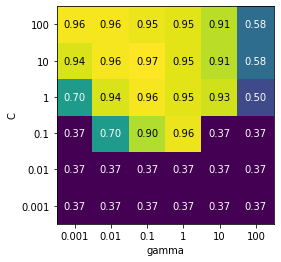

In [32]:
# 시각화

scores = np.array(results.mean_test_score).reshape(6, 6)

# 교차 검증 평균 점수 히트맵 그래프
mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'],
                      ylabel='C', yticklabels=param_grid['C'], cmap="viridis")

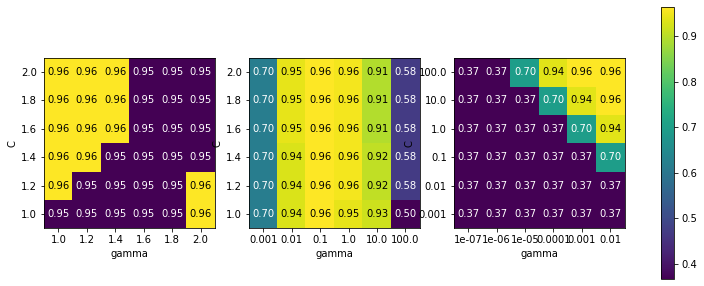

In [33]:
# 적절하지 않은 매개변수 그리드의 히트맵

fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist())

\- 결과 1 : 매개변수 C, gamma 스케일 & 범위가 부적적할 때/전혀 중요하지 않을 때  
\- 결과 2 : 매개변수 gamma만 정확도에 영향  
\- 결과 3 : 최적치가 그래프 경계에 존재 - 경계 너머 영역이 포함되도록 매개변수 검색 범위 조정

#### 비대칭 매개변수 그리드 탐색  
모든 매개변수 조합에 대해 GridSearchCV 수행이 좋지 않은 경우
* kernel = 'linear' :매개변수 C만 사용 = gamma 값 조사는 시간낭비
* kernel = 'rbf' : C 와 gamma 모두 사용  
> 조건부 매개변수 조합 : 딕셔너리 리스트의 param_grid 적용  
    * 리스트의 각 딕셔너리 = 독립적 그리드

In [34]:
# 각 그리드의 kernel 매개변수 설정

param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]

print("List of grids:\n{}".format(param_grid))

List of grids:
[{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [35]:
# 매개변수 그리드 적용

grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [36]:
# cv_results_ 속성

results = pd.DataFrame(grid_search.cv_results_)
# 결과 전치해서 출력
display(results.T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.00119982,0.000799799,0.00079937,0.000799608,0.000996351,0.000999451,0.000999498,0.00220408,0.00220661,0.000998735,0.00039978,0.00119939,0.000999689,0.000599527,0.000599337,0.000599575,0.000799608,0.000999594,0.000399685,0.000799656,0.000399733,0.000599718,0.000799656,0.000999451,0.000599623,0.00039978,0.000599718,0.000599623,0.000999498,0.000999594,0.000599813,0.000599527,0.000399828,0.000599766,0.000999451,0.000999498,0.000599718,0.000599718,0.000599194,0.000399828,0.000399637,0.000399685
std_fit_time,0.000399666,0.0003999,0.000399686,0.000748252,8.08517e-06,7.53946e-07,2.37176e-06,0.000976539,0.00147038,0.000637997,0.000489629,0.000399756,3.98951e-07,0.000489512,0.000489356,0.000489551,0.000399804,1.16801e-07,0.000489512,0.000399828,0.00048957,0.000489668,0.000399828,2.13248e-07,0.00048959,0.000489629,0.000489668,0.00048959,9.53674e-08,1.16801e-07,0.000489746,0.000489512,0.000489687,0.000489707,1.50789e-07,2.33602e-07,0.000489668,0.000489668,0.00048924,0.000489687,0.000489454,0.000489512
mean_score_time,0.00039959,0.000598478,0.000200176,0.000601006,0.000400114,0.00059948,0.000199509,0.00119786,0.000795794,0.000199938,0.000599575,0.00019989,0,0.000399876,0.000399733,0.000399828,0.000199842,0.00019989,0.000599766,0.00019989,0,0.000399733,0.000599766,0.000399733,0,0.000599575,0.00019989,0.00019989,0.000999355,0.000399685,0,0.000199842,0.000399828,0.00019989,0.000999403,0.000399733,0.000199842,0.000199842,0.000199986,0.000199938,0.00039959,0.000399828
std_score_time,0.000489395,0.000488657,0.000400352,0.000490723,0.000490039,0.000489473,0.000399017,0.000394684,0.000397908,0.000399876,0.000489551,0.00039978,0,0.000489746,0.00048957,0.000489687,0.000399685,0.00039978,0.000489707,0.00039978,0,0.00048957,0.000489707,0.00048957,0,0.000489551,0.00039978,0.00039978,2.4314e-07,0.000489512,0,0.000399685,0.000489687,0.00039978,9.53674e-08,0.00048957,0.000399685,0.000399685,0.000399971,0.000399876,0.000489395,0.000489687
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,0.01,0.01,0.1,0.1,0.1,0.1,0.1,0.1,1,1,1,1,1,1,10,10,10,10,10,10,100,100,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 1, 'kernel': 'rbf'}","{'C': 1, 'gamma': 10, 'kernel': 'rbf'}","{'C': 1, 'gamma': 100, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 1, 'kernel': 'rbf'}","{'C': 10, 'gamma': 10, 'kernel': 'rbf'}","{'C': 10, 'gamma': 100, 'kernel': 'rbf'}","{'C': 100, 'gamma': 0.001, 'kernel': 'rbf

#### 그리드 서치에 다양한 교차 검증 적용
GridSearchCV
* 분류 : 계층형 k-겹 교차 검증
* 회귀 : k-겹 교차 검증  
  
#### 중첩 교차 검증
원본데이터 : 교차 검증 분할 방식 이용 - 훈련 세트 / 테스트 세트 나누기  
  
1. 바깥쪽 루프에서 data split - 훈련 / 테스트 세트
2. 각 훈련 세트에 대해 그리드 서치
    * 바깥 루프에서 나뉜 훈련세트 별 다른 최적의 매개변수
3. 바깥쪽에서 분할된 테스트 세트 점수 측정
    * 위에서 설정된 최적의 매개변수 사용
  
→ 테스트 점수의 목록 생성
* 그리드 서치를 통해 찾은 최적의 매개변수가 모델을 얼마나 잘 일반화 하는가?
* 특정 데이터셋이 주어진 모델을 얼마나 잘 일반화하는지 평가
    * 새로운 데이터에 적용할 모델은 아님 !
  
  
> cross_val_score : 중첩 교차 검증 구현

In [37]:
# 안쪽 루프 & 바깥쪽 루프에 각각 계층형 5-겹 교차 검증 사용
## param_grid 매개변수 조합 : 6 x 6 = 36
## 만들어지는 총 모델 : 36 x 5 x 5

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5),
                         iris.data, iris.target, cv=5)

print("Cross-validation scores: ", scores)
print("Mean cross-validation score: ", scores.mean())

Cross-validation scores:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
Mean cross-validation score:  0.9800000000000001


\- 결과 : SVC는 iris 데이터셋에서의 평균 교차 검증 정확도가 98%

In [38]:
# 위 코드 풀어쓰기

def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # 바깥쪽 outer_cv 분할 순회
    # split - 훈련, 테스트 세트 인덱스 반환
    for training_samples, test_samples in outer_cv.split(X, y):
        # 최적의 매개변수 찾기
        best_parms = {}
        best_score = -np.inf
        # 매개변수 그리드 순회
        for parameters in parameter_grid:
            # 안쪽 교차검증 점수 기록
            cv_scores = []
            # 안쪽 inner_cv 분할 순회
            for inner_train, inner_test in inner_cv.split(
                    X[training_samples], y[training_samples]):
                # 분류기 생성 - 훈련 데이터 + 주어진 매개변수
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                # 검증 test 세트로 평가
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 안쪽 교차 검증의 평균 점수
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                # 점수 더 좋으면 매개변수와 기록
                best_score = mean_score
                best_params = parameters
        # 분류기 생성 - 전체 바깥쪽 훈련 데이터 사용
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        # 테스트 세트 이용 evaluate
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return np.array(outer_scores)



# iris dataset 적용
from sklearn.model_selection import ParameterGrid, StratifiedKFold

scores = nested_cv(iris.data, iris.target, StratifiedKFold(5),StratifiedKFold(5),
                   SVC, ParameterGrid(param_grid))

print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96666667 1.         0.96666667 0.96666667 1.        ]


***
## 5.3 평가 지표와 측정
* __비즈니스 임팩트__ : 어떤 머신러닝 애플리케이션에서 특정 알고리즘을 선택해서 나타난 결과
    * 대리 평가 방식 : 계산하기 쉬운 평가지표를 이용해서 비즈니스 목적에 가장 가까운 지표 찾기
        * 근사 지표 : 모델 평가 / 선택할 때마다 사용

### 5.3.2 이진 분류의 평가 지표
* 양성 클래스 <관심 대상>
* 음성 클래스
  
#### 에러의 종류
정확도를 잘못 측정  
: 두 클래스 중 하나의 클래스의 비중이 훨씬 더 많을 때 중요
> * __거짓 양성__ : 잘못된 양성 예측  
    건강한 사람(음성)을 암(양성)으로 진단  
  
  
> * __거짓 음성__ : 잘못된 음성 예측  
    암에 걸린 사람(양성)을 정상(음성)으로 진단

#### 불균형 데이터셋
: 한 클래스가 다른 클래스보다 훨씬 더 많은 데이터셋  
  
  
예) 100 개의 광고중 - 사용자가 클릭하지 않음 99개, 사용자가 클릭 1개

In [39]:
# 9:1 불균형한 데이터 생성
from sklearn.datasets import load_digits

digits = load_digits()
y = digits.target == 9  #숫자 9를 다른 숫자와 구분

X_train, X_test, y_train, y_test, = train_test_split(
    digits.data, y, random_state=0)

# DummyClassifier : 예측값 = 항상 9가 아닌 다수인 클래스
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train,y_train)

pred_most_frequent = dummy_majority.predict(X_test)

print("Unique Predicted Label: ", np.unique(pred_most_frequent))
print("Test score : {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique Predicted Label:  [False]
Test score : 0.90


In [40]:
# 실제 분류기 DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("Test score : {:.2f}".format(tree.score(X_test, y_test)))

Test score : 0.92


\- 더미 분류기와 거의 비슷 : 분류기 잘못 사용 / 이 문제에 적합하지 않은 방법

In [41]:
# LogisticRegression

from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy score: {:.2f}".format(dummy.score(X_test, y_test)))

logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg score: {:.2f}".format(logreg.score(X_test, y_test)))

dummy score: 0.82
logreg score: 0.98


\- 불균형 데이터셋에서 예측 성능을 정량화하는데 정확도는 적절한 측정 방법이 아님

#### 오차 행렬

In [42]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[402   1]
 [  6  41]]


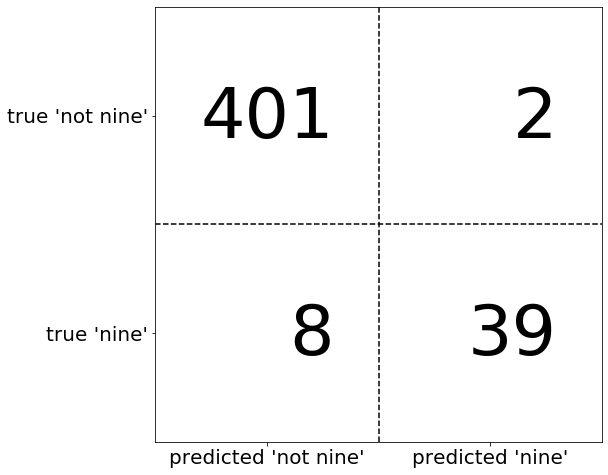

In [43]:
# '9' 와 '9가 아님' 분류 문제의 오차 행렬
mglearn.plots.plot_confusion_matrix_illustration()

> 이진 분류의 오차 행렬

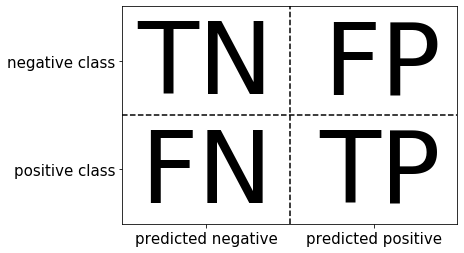

In [44]:
mglearn.plots.plot_binary_confusion_matrix()

In [45]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic Regression")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[372  31]
 [ 46   1]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic Regression
[[402   1]
 [  6  41]]


#### 정확도 / 정말도, 재현율, f-점수
> __정확도__ = (TP + TN) / 전체  

> __정밀도 precision__ : 진짜 양성 / 양성으로 예측된 것
* TP / ( TP + FP )
* 거짓 양성 FP 줄일 때 성능지표  
* 양성으로 예측된 것들 중 진짜 양성인 것들

> __재현율 recall__ : 양성 클래스 / 전체 양성 샘플 = __민감도 sensitivity__
* TP / ( TP + FN )
* 모든 양성 샘플 식별할 때 성능지표 (FN 피할때)
    * 암 진단 식별
* 전체 진짜 양성 중에서 양성이라고 바르게 분류된 것들

> __f-점수__ : 정밀도와 재현율의 조화 평균
* 정밀도와 재현율 함께 고려 = 불균형한 데이터셋에서 더 좋은 지표

#### 불확실성 고려
예측을 만드는 것 = decision_function, predict_proba 출력의 임계값 검증
* 이진 탐색에서의 임계값
    * decision_function : 0
    * predict_proba : 0.5

__예시__ 이진분류문제- 음성 클래스(0) 400개, 양성 클래스(1) 50개

In [46]:
X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2],
                  random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



\- 샘플의 수가 더 많은 클래스 0 에 초점  
→ 임계값 낮춰 클래스 1 재현율 높이기 

In [48]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



\- 클래스 1의 정밀도 낮아짐, 재현율 높아짐  
\- 검정 테두리 영역 (클래스 1) 넓어짐

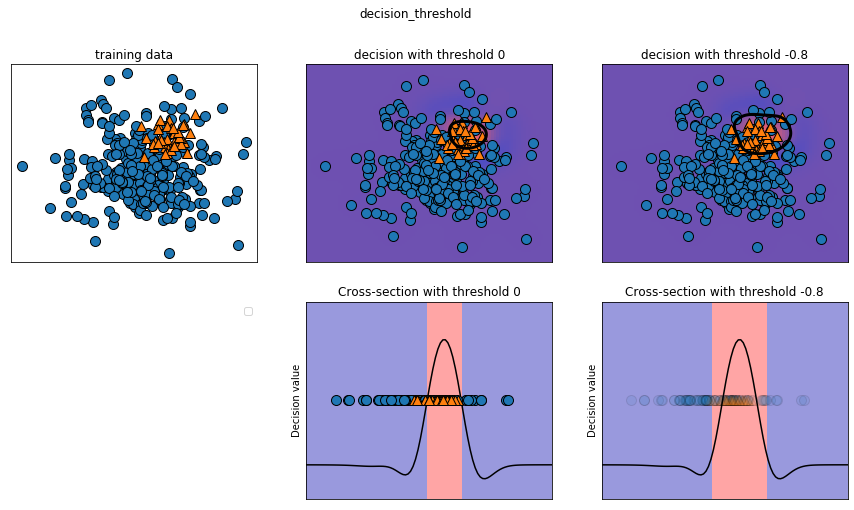

In [49]:
mglearn.plots.plot_decision_threshold()

#### 정밀도 - 재현율 곡선 & ROC 곡선
* 운영 포인트 지정 : 분류기의 필요조건 지정하여 성능 보장 (예)90% 재현율  
  
  
> __정밀도-재현율 곡선__ : 한 번에 정밀도 / 재현율의 모든 장단점 파악. __precision_recall_curve__

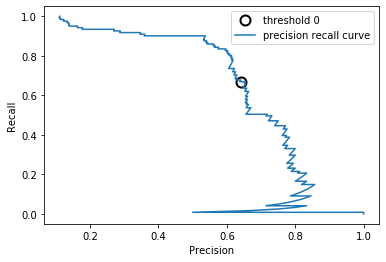

In [50]:
# add more data points - smoothness
X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0,2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train,y_train)

## 정밀도-재현율 곡선
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(
    y_test, svc.decision_function(X_test)) 

# threshold close to 0
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label = "threshold 0", fillstyle='none', c='k', mew=2)

plt.plot(precision, recall, label="precision recall curve")
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

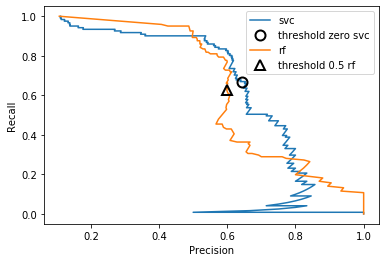

In [51]:
# RandomForest vs. SVM

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

# RandomForestClassifier has predict_proba, but not decision_function
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(
    y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")

plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold zero svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k',
         markersize=10, label="threshold 0.5 rf", fillstyle="none", mew=2)
plt.xlabel("Precision")
plt.ylabel("Recall")
plt.legend(loc="best")

In [53]:
# f-1 점수
from sklearn.metrics import f1_score

print("f1_score of random forest: {:.3f}".format(
    f1_score(y_test, rf.predict(X_test))))
print("f1_score of svc: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1_score of random forest: 0.610
f1_score of svc: 0.656


> __평균 정밀도 average precision__ : 정밀도-재현률 곡선의 아래 면적 __average_precision_score__

In [54]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of svc: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of svc: 0.666


#### ROC와 AUC
> __ROC 곡선__ : 진짜 양성 비율에 대한 거짓 양성 비율. __roc_curve__  
* 진짜 양성 비율 TPR : 재현율
* 거짓 양성 비율 FPR : 전체 음석 샘플 중 거짓 양성으로 잘못 분류한 비율 = FP / ( FP + TN )
* 왼쪽에 가까울수록 이상적 
    * 거짓 양성 비율 낮으면서 재현율 높은 분류기가 좋음  

임계값 선정을 위해 테스트 세트가 아닌 별도의 검증 세트 활용!

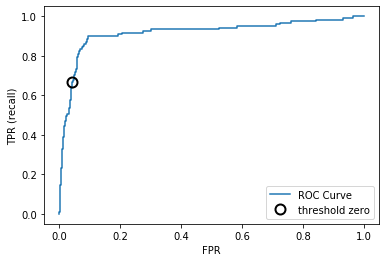

In [55]:
# SVM 의 ROC 곡선

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero", fillstyle="none", c='k', mew=2)
plt.legend(loc=4)

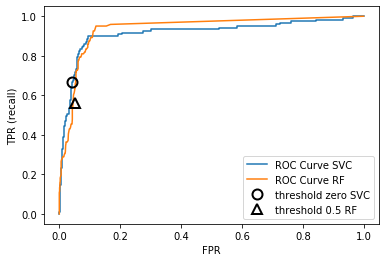

In [56]:
# RandomForest vs. SVM

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC Curve SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC Curve RF")

plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10,
         label="threshold zero SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10,
         label="threshold 0.5 RF", fillstyle="none", c='k', mew=2)

plt.legend(loc=4)

> __AUC__ : ROC 곡선의 아래 면적 __roc_auc_score__
* 양성 샘플의 순위 평가
* p ( 분류기에서 무작위로 선택한 양성 클래스 포인트 점수 > 무작위로 선택한 음성 클래스 포인트 점수 )
* 불균형한 클래스 분류 문제에 유용

In [57]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for Random Forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for Random Forest: 0.937
AUC for SVC: 0.916


__digits dataset__ - 9와 다른 숫자 구분  
kernel 의 gamma 폭 다르게 한 SVM 적용

gamma = 1.00  accuracy = 0.90  AUC = 0.50
gamma = 0.10  accuracy = 0.90  AUC = 0.96
gamma = 0.01  accuracy = 0.90  AUC = 1.00


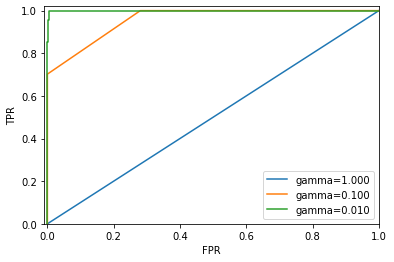

In [59]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test , svc.decision_function(X_test))
    print("gamma = {:.2f}  accuracy = {:.2f}  AUC = {:.2f}".format(
          gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc="best")

\- gamma = 1.0 : 무작위로 선택한 수준  
\- gamma = 0.1 : AUC 향상  
\- gamma = 0.01: 완변한 AUC 값 = 1 (임계값 조절을 통한 높은 예측 성능)  

### 5.3.3 다중 분류의 평가 지표
* 정확도 : 정확히 분류된 샘플의 비율  
  
  
__digits datset__ - 10개 손글씨 분류

In [61]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target, random_state=0)

lr = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)
pred = lr.predict(X_test)

print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n{}".format(confusion_matrix(y_test, pred)))

Accuracy: 0.953
Confusion matrix:
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


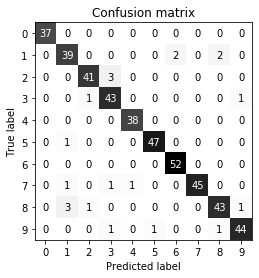

In [62]:
# 오차행렬

scores_image = mglearn.tools.heatmap(
    confusion_matrix(y_test, pred), xlabel='Predicted label',
    ylabel='True label', xticklabels=digits.target_names,
    yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis()

In [63]:
# 정밀도, 재현율, f-score

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.89      0.91      0.90        43
           2       0.95      0.93      0.94        44
           3       0.90      0.96      0.92        45
           4       0.97      1.00      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       1.00      0.94      0.97        48
           8       0.93      0.90      0.91        48
           9       0.96      0.94      0.95        47

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



> 다중 클래스용 __f-score__ : 
1. 한 클래스를 양성, 나머지 클래스들 음성 클래스로 간주
2. 클래스별 f-score 계산
3. 클래스별 f-score 평균
    * "macro" : 클래스 크기 상관없이 모든 클래스 같은 비중 (가중치 X)
    * "weighted" : 가중치 = 클래스별 샘플 수
    * "micro" : 모든 클래스의 FP, FN, TP 갯수 바탕으로 정밀도, 재현율, f-score 추천

In [64]:
print("Micro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="micro")))
print("Macro average f1 score: {:.3f}".format(
    f1_score(y_test, pred, average="macro")))

Micro average f1 score: 0.953
Macro average f1 score: 0.954


### 5.3.4 회귀 평가의 지표
* R²

### 5.3.5 모델 선택에서 평가 지표 사용
예) GridSearchCV, cross_val_score 이용한 모델 선택 시, AUC 같은 평가 지표 사용
* __scoring__ 매개변수 사용  
  
  
__digits datset__ - 9 / 9 아님 분류 SVM 모델의 평균 정밀도 (average_precision)

In [66]:
# default scoring for classification is accuracy
print("기본 평가 지표: {}".format(
    cross_val_score(SVC(), digits.data, digits.target == 9, cv=5)))

# scoring="accuracy" : same results
explicit_accuracy =  cross_val_score(SVC(), digits.data, digits.target == 9,
                                     scoring="accuracy", cv=5)
print("정확도 지표: {}".format(explicit_accuracy))

roc_auc =  cross_val_score(SVC(), digits.data, digits.target == 9,
                           scoring="roc_auc", cv=5)
print("평균 정밀도 지표: {}".format(roc_auc))

기본 평가 지표: [0.975      0.99166667 1.         0.99442897 0.98050139]
정확도 지표: [0.975      0.99166667 1.         0.99442897 0.98050139]
평균 정밀도 지표: [0.99717078 0.99854252 1.         0.999828   0.98400413]


In [67]:
# 한 번에 여러 측정 지표 계산

res = cross_validate(SVC(), digits.data, digits.target == 9,
                     scoring=["accuracy", "roc_auc", "recall_macro"],
                     return_train_score=True, cv=5)
display(pd.DataFrame(res))

,fit_time,score_time,test_accuracy,train_accuracy,test_roc_auc,train_roc_auc,test_recall_macro,train_recall_macro
0,0.028990,0.013985,0.975000,0.994433,0.997171,0.998679,0.887346,0.972222
1,0.028965,0.012011,0.991667,0.995825,0.998543,0.999141,0.958333,0.982252
2,0.031247,0.015628,1.000000,0.995132,1.000000,0.998975,1.000000,0.978780
3,0.031248,0.015626,0.994429,0.995828,0.999828,0.998825,0.972222,0.982252
4,0.031249,0.015625,0.980501,0.996523,0.984004,0.999914,0.902778,0.985725


In [77]:
# 최적의 매개변수 선택 위한 평가 지표 바꾸기

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target == 9, random_state=0)

# 일부러 적절하지 않은 그리드 생성
param_grid = {'gamma': [0.0001, 0.01, 0.1, 1, 10]}


# 기본 정확도 측정 지표 사용
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=3)
grid.fit(X_train, y_train)

print("정확도 지표 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최적의 교차 검증 점수 (accuracy)): {:.3f}".format(grid.best_score_))
print("Test set 평균 정밀도: {:.3f}".format(
    average_precision_score(y_test, grid.decision_function(X_test))))
print("Test set 정확도: {:.3f}".format(grid.score(X_test, y_test)))


# 평균 정밀도 AUC 지표 사용
grid = GridSearchCV(SVC(), param_grid=param_grid, scoring="average_precision", cv=3)
grid.fit(X_train, y_train)

print("\nAUC 지표 사용한 그리드 서치")
print("최적의 파라미터:", grid.best_params_)
print("최적의 교차 검증 점수 (AUC): {:.3f}".format(grid.best_score_))
print("Test set 평균 정밀도: {:.3f}".format(
    average_precision_score(y_test, grid.decision_function(X_test))))
print("Test set 정확도: {:.3f}".format(grid.score(X_test, y_test)))

정확도 지표 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.0001}
최적의 교차 검증 점수 (accuracy)): 0.972
Test set 평균 정밀도: 0.966
Test set 정확도: 0.973

AUC 지표 사용한 그리드 서치
최적의 파라미터: {'gamma': 0.01}
최적의 교차 검증 점수 (AUC): 0.985
Test set 평균 정밀도: 0.996
Test set 정확도: 0.996


In [1]:
# 가능한 평가 방식
from sklearn.metrics.scorer import SCORERS
print("Available scorers:")
print(sorted(SCORERS.keys()))

Available scorers:
['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'v_measure_score']


C:\Users\HHDo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


### ★ 정리

1. 교차 검증
    * 모델 학습 : 훈련 데이터
    * 모델 & 매개변수 선택 : 검증 데이터
    * 모델 평가 : 테스트 데이터
        * 교차 검증으로 분할 반복 
            * 훈련 세트 / 테스트 세트
            * 훈련세트에 교차검증 = 모델, 모델 매개변수 선택
  
  
2. 평가 지표 & 반복 (모델 선택 & 평가에 사용)